In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training sets
dataset_train = pd.read_csv('FBOK34.SA.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1073):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU
from keras.layers import Dropout

Using TensorFlow backend.


In [7]:
# Initialising the RNN
regressor = Sequential()

In [8]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(GRU(units = 100))
regressor.add(Dropout(0.2))

In [12]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [13]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
1013/1013 [==============================] - 10s 10ms/step - loss: 0.0251
Epoch 2/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0029
Epoch 3/150
1013/1013 [==============================] - 7s 6ms/step - loss: 0.0023
Epoch 4/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0023
Epoch 5/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0022
Epoch 6/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0019
Epoch 7/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0019
Epoch 8/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0016
Epoch 9/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0015
Epoch 10/150
1013/1013 [==============================] - 6s 6ms/step - loss: 0.0016
Epoch 11/150
1013/1013 [==============================] - 7s 7ms/step - loss: 0.0015
Epoch 12/150
1013/1013 [

1013/1013 [==============================] - 6s 6ms/step - loss: 7.1899e-04
Epoch 93/150
1013/1013 [==============================] - 7s 7ms/step - loss: 7.4856e-04
Epoch 94/150
1013/1013 [==============================] - 6s 6ms/step - loss: 7.2094e-04
Epoch 95/150
1013/1013 [==============================] - 6s 6ms/step - loss: 7.4176e-04
Epoch 96/150
1013/1013 [==============================] - 6s 6ms/step - loss: 5.7266e-04
Epoch 97/150
1013/1013 [==============================] - 6s 6ms/step - loss: 6.6785e-04
Epoch 98/150
1013/1013 [==============================] - 5s 5ms/step - loss: 7.1349e-04
Epoch 99/150
1013/1013 [==============================] - 5s 5ms/step - loss: 7.2406e-04
Epoch 100/150
1013/1013 [==============================] - 6s 6ms/step - loss: 7.2798e-04
Epoch 101/150
1013/1013 [==============================] - 6s 6ms/step - loss: 7.4949e-04
Epoch 102/150
1013/1013 [==============================] - 6s 6ms/step - loss: 6.2643e-04
Epoch 103/150
1013/1013 [======

In [15]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('FBOK34.SA_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [16]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 135):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

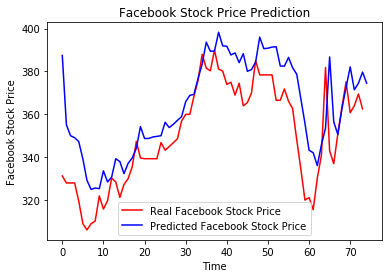

In [17]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Facebook Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Facebook Stock Price')
plt.title('Facebook Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Facebook Stock Price')
plt.legend()
plt.show()